## Metropolois Monte Carlo sampling, Ising models and phase transitions.

In [83]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load scientific and plotting libraries 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# Load widgets and animation libs 
#from ipywidgets import interact, widgets
#from PIL import Image

# Import random number generators: 
from numpy.random import random
from numpy.random import randint
from numpy.random import choice 
from numpy.random import normal

### 0 Where to get random numbers and distributions?: 
 **numpy.random** and **scipy.stats** are the two major  libraries for random numbers and probability distributions in Python.
In particular numpy.random has the fastest random number generators based on low level C code. <br>
https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html <br> 
**Scipy.stats** provides an extensive library of statistical distributions and various tools for statistical analysis (correlation functions, trasnformations, statistical tests etc)  <br> https://docs.scipy.org/doc/scipy/reference/stats.html 
<br>

## Ising models and their link with continuous phase transitions. 

Ising models provide one of the simplest possible toy systems for studying generic aspects of continuous phase transitions. Typical ising models describe a lattice of intereacting two state spins. For the original ising model interactions exist only between the nearest neighbour spin pairs; for instance (i-1,i+1) and (i, i+1) in case of 1D ising model. Ising model is defined by its Hamiltonian and posisboe boundary conditions, e.g weather spins at the end of lattice are dangling or interacing with their mirror image. There can also be an additional source of interactions if external magnetic field of strength B is present which exerts uniform alinging force on all spins. 

$$H([s])= \sum_{\langle ij \rangle} J_{ij}s_i s_j - \mu B \sum_i s_i$$

Connection with the thermodynamic observables of interest is established through canonical partition function. 
$$Z=\sum_{[s]}e^{-H([s])/k_B T}$$

Except for 1D ising model evaluating the partition function for higher dimensions  turns out to be nearly impossible to evaluate analyticaly (notable exceptions are Onsager's solution for 2D ising with no field and a handful other special cases). 

Computationally the source of difficulty in evaluating $Z(T)$ is the quickly rising number of configurations with increasing size of lattice. For instance fore very small lattice of 10x10 spins the number of possible configurations is $2^{100}\sim 10^{30}$. This is a familiar situation that we have encountered when faced with the problem of evaluating multi-dimensional integrals. Fortunately as before in this task Monte Carlo methods prove indispensable as we will see in next few sections. Below we review key differences between ising models in 1D and in 2D or higher dimensions.

(i) 1D Ising model (No phase transition at finite $T_c$): Introducing a domain wall (defect) in an ordered state increases the energy by  4J, while the entropy changes by  $k_BlogN$ , due to  N  choices to introduce the domain. So net change in the free energy,  $\Delta F=4J−k_BTlogN$ , is always negative for $N \rightarrow \infty$ . In other words there is no phase transition at any finite temperature
 
 $$T_c = 0$$ 

Thus, the system prefers a disordered state. So, there is no spontaneous symmetry breaking in 1D for an infinite Ising chain. This argument can be generalized for any domain of length  L  and higher dimensions.

(ii) 2D Ising model (phase transition at finite $T_c$) : For 2D and higher dimensions creation of islands of defects cost energy proportional to the boundary size of island L. Hence the energetic cost of is  proportional to the perimeter  $L=\epsilon N^2$ , where  $0<\epsilon<1$ . In 2D therefore  there is a tug of war between entropy of defects and energetic penalty which they introduce. This energy and entropy balance results in a finite value for a critical temperature estimated: $$T_c \sim J/k_B$$ 

### Metropolis Monte Carlo algorithm

Metropolis Monte Carlo algorithm is a convenient way of carrying out importance sampling of the ising models. That is sampling the states that "matter" consistent with Boltzman distribution and doing so in an efficient way. This algorithm is different from the brute force monte carlo method that we have used for evaluating integrals in that we generate  

${\bf i. Initialization.}$ Pick an initiaal configuration of spins $[s_0]=(s_1,...s_N)$ e.g by choosing random orientation for each spins (+1, -1) to  or giving them same orientation for all spins

${\bf ii. Attempt\,\, spin\,\, flip.\,\,}$ Pick a spin at random and flip it. E.g multiply by -1 so that +1 state becomes -1 and vice versa. this generated a new configuration $[s_1]$

${\bf iii. Acceptance/Rejection}$ Evaluate energy differene between old configuration $[s_{0}]$ and new one $[s_{1}]$ with flipped spin which has created in previous step. The $\Delta E=E_{1}-E_{0}$ is used for deciding weather the move is accepted or rejected in a way that is consistent with Boltzman distribution: 

$$w=\frac{P[s_{1}]}{P[s_{0}]}=exp\big(-\beta[E_{1}-E_{0}] \big ) $$

This is done by generating a unifor random number $r$ between $[0,1]$ and 

(a) if $r  \leq w$ Accept the spin flip thereby keeping $[s_1]$ and proceeding to try new spin flip via step ii.  

(b) if $r  > w$ reject the spin flip and set  $[s_1]=[s_0]$ and proceeding to try a new spin flip via step ii.

### Simulation tips

By continuing the process of spin flipping an rejection/acceptance via steps ii and iii. untill the system samples the states to a sufficient degree. Sufficient for 2D ising model of size $N\sim 10$ would mean something on the order of $n_{MC} \sim 10^5-10^6$ steps. the process of iteration generates a chain of spin configurations. 

$$ [s_0] \rightarrow [s_1] \rightarrow [s_2] ... \rightarrow [s_{n_{MC}}]$$

Metropolis algorithm ensures that for large $n_{MC}$ we are sampling spin configurations according to Boltzman distribution. In other words as the spin staes flip the system is carrying out a "random walk" in configurational space vising the regions of different energy in accordance with Boltzman distribution. 

This exploration of state sspace means that the averages of quantities like magnetization or energy can be evaluated as a simple arithmetic average. 

$$\langle M \rangle = \sum_{[s]} m([s]) \frac{e^{-\beta H([s]) }}{Z} \approx \frac{1}{n_{MC}} \sum^{i=n_{MC}}_{i=1} M[s_i]$$

This is very much like performing a  experiment and collecting data. Although one expexpts the approximation to work well in the limit of long sampling a few basic strategies can help achieving it with less steps. 

(a) ${\bf Equilibration.}$ We choose initiate condition at random and chances are it is not going to be representative of states where the system will end up. Hence it makes sense to discard the initial part of simulation as "equilibration" step where the system relaxes into correct Bolzmann distribution. This can be done by monitoring energy and equilibration. 

(b) ${\bf Sparse\,\, averaging.}$ Keep in mind on what basis we expect empirical averages defined above to approach true expectation. That's right the measurments need to be independent so that law of large number works and we obtain reliable value of mean. We can ensure the independence between emasruments by computing time scale (number of steps) over which magnetization values are correlated and record our data over scales greater than this. The safest bet would be to carry out measruements every N number of steps where N is the number of spins. This way we are measruing when moving all the spins on average. 

(c) ${\bf Assessing\,\, smapling\,\, and statistical\,\, errors.\,\,}$

Ideally one would can carry out multiple independent simulations and compute the distribution of mean values of magnetization and energy which would provide the assesment of sampling. For large number of independent simulations the error in estimating mean should go down as expected $\sim n^{-1/2}$.  

Another alternative is when the system is large one may carry out data blocking. That is divide system in multiple blocks which are still large enough and can be considered as relatively independent of each other. Thus we can again use central limit theorem and law of large numbers to quantify confidence interval and standard deviation from the mean. 

### Simple python code for Metropolis Monte Carlo

Below we translate the Metropolis algirthm describe in the sections above into a very short and simple Python code for simulating 2D ising model. The simplicity of the code will allow you to see the essential physics and exploit it with ease for carrying out explorative simulations. Using this code snippet as an example we can later optimize the code to make it more sophisticated, introduce new features, etc. 

In [330]:
'''Here is a simple implementation of Metropolis Monte Carlo'''
B = 0           # field strength, -mu*B*s, mu=1
J = 1           # coupling constant
T = 1           # Use energy units for the temperature kb=1, beta=1/T
N = 100
n_mcsteps=10000

def generateLattice(N):
    '''create square lattice of spin states, stored as 2D numpy array'''  
    
    shape = (N, N)                      
    spins = choice([-1, 1], size=shape)  
    return spins    
    

def getDeltaE(spins, N, J, B, i, j): 
    '''Compute energy difference betwee old and spin flipped configuration.
    Peridoic boundary conditions have been imposed. 
    Study this function carefully and understand the meaning of each term'''
    
    z = spins[(i-1)%N, j] + spins[(i+1)%N, j] + spins[i, (j-1)%N] + spins[i, (j+1)%N]
    return 2*spins[i,j]*(J*z + B)


def doMC(spins, N, J, B, T):
    ''' Attempt a flip of a randomly chosen spin at ij location of lattice''' 
    
    i, j = choice(N), choice(N)
    deltaE = getDeltaE(spins, N, J, B, i, j)
    
    
    if deltaE < 0:
        '''For negative dE always accept'''
        spins[i,j] *= -1
            
    elif np.exp(-deltaE/T) > random():
        '''For positive dE distribute acceptance according to Boltzman dist'''
        spins[i,j] *= -1
    
    return spins

### 1.2 Quantities of interest

#### Energy $E$

We have seen that energy is the first cumulant of $logZ$ and is hence obtained by taking first derivative with respect to $-\beta$. In Monte Carlo simulations, however we are not constructing Z analytically. Instead $E[s]$ for a spin configuration $[s]$ is evaluted explicitely by carrying out summation over all posisbe spin interactions in the hamiltonian 

$$E[s]=H([s])= \sum_{\langle ij \rangle} J_{ij}s_i s_j - \mu B \sum_i s_i$$. Computing energy for different configurations ($[s_i]$ $i=1... n_{MC}$) we can then estimate the ensemble average. 

$$ \langle E \rangle \approx \frac{1}{n_{MC}} \sum^{i=n_{MC}}_{i=1} H[s_i] $$

#### Magnetization
Total magnetization, M is a key quantity magnitude of which tels us if we have any appreciable macrosopic magnetizm. Computation of M is simple it is just a direct summation of the total spin values over all lattice points, $$ M([s])=\sum_is_i $$. For comparison between systems having different sizes it is more convenient to use magnetization per spin instead, $m$ which is and intesive quantity defined as:
$$m([s])=\frac{1}{N}\sum_is_i =\frac{M}{N}$$
For a system in contact with heat bath the value of m will fluctuate and therefore the average value is of more singinifcance, which is also a quanitaty derived directly from the partition function.Again for obtaining ensemble average we simply form arithmetic mean of sampled values:

$$ \langle M \rangle  \approx \frac{1}{n_{MC}} \sum^{i=n_{MC}}_{i=1} M[s_i] $$

#### Heat capacity $C_v$

Heat capacity is again the familiar expression established in our treatment of canonical ensemble. 

$$ C_V(T) = \Big (\frac{\partial E}{\partial T} \Big )_V= \frac{1}{k_B T^2} \big(\langle E^2 \rangle-\langle E \rangle^2 \big) $$


#### Susceptibility $\chi$

Magnetic susceptibility quantifies response of the ssytem to the variation of magnetic field.

$$\chi_T=\Big (\frac{\partial M}{\partial B} \Big )_T= \frac{1}{k_B T} \big(\langle M^2 \rangle-\langle M \rangle^2 \big) $$

#### Correlation length $c(i,j)$
In high temperature, the spins point up and down randomly. While in low temperature, all spines tend to align to each other. To quantify this, we can define a quantity named correlation length $\xi$, which can be defined mathematically through correlation function $c(i,j)$ $$
c(i,j)=\langle s_i-\langle s_i\rangle\rangle \langle s_j-\langle s_j\rangle\rangle
$$ which measured the largest cluster of aligned spins.

#### Parition function and Free energy 

Obviously, the parition function and free energy are the entry point to obtaing all the other quantiaties by means of taking derivatives. 

$$Z=\sum_{[s]}e^{-\beta H([s])}=\sum_{[s]}e^{-\beta \big ( \sum_{\langle ij \rangle} J_{ij}s_i s_j - \mu B M \big )}$$

Free energy is given by the celebrated expression for canonical ensemble

$$F=-\beta^{-1} log Z $$

There is also a great deal of interest in studying how the free energy depends on M, which is similiar to the cases where we are interested how free energy of a polymer depends on some conformational coordinate or how free energy of liquid depends on the denisty. 

$$F(M)=-\beta^{-1} log Z(M) $$

here the Z(M) is a partial sum over states for which magnetization is equal to a particular value M as opposed to Z where summation is unrestricted. 

In [474]:
''' Calculate observables '''
def getEnergy(spins,N,J,B):
    
    E = 0
    for i in range(N):
        for j in range(N):
            
            # Compute energy of each spin assuming periodic boundary conditions
            z = spins[(i+1)%N, j] + spins[i,(j+1)%N] 
            + spins[(i-1)%N, j] + spins[i,(j-1)%N]
            E += -J*z*spins[i,j]
            
    E=E/4.0 # Since we overcounted interactions 4 times divide by 4.
    return E-B*np.sum(spins) #Field contribution added

def getMagnetisation(s):
    return np.mean(s)

def getC(Ei, T):
    Ei = np.array(Ei)
    return (np.var(Es))/T**2

def getXi(Mi, T):
    Mi = np.array(Ms)
    return (np.var(Mi**2))/T

### First, run some trial simulations and check visually if results make any sense.

Text(0, 0.5, 'spin, $ s_j$')

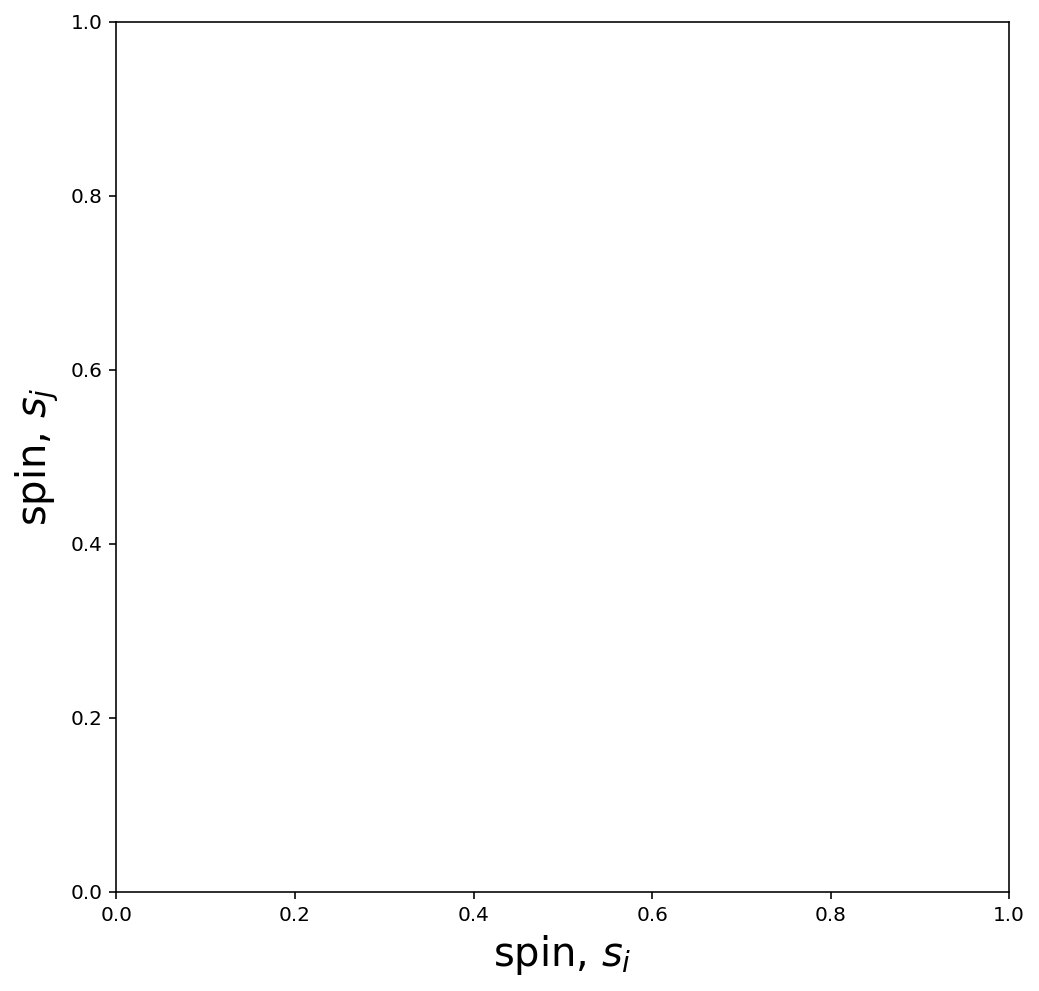

In [483]:
N=160
J=1
B=0
n_mcsteps = 100

T = 0.5  # Try different temps. For J=1 vary T between 1-3 to see qualitative change. 

''' We run the Monte Carlo using a loop of n_mcsteps iterations. Later one we can create a more 
sophisticated object oriented code where one can simply execute single command. '''

spins = generateLattice(N)

for n in range(n_mcsteps):
    spins = doMC(spins, N, J, B, T)

# Plot the lattice before and after
fig,ax=plt.subplots(figsize=(8,8))
ax.set_xlabel('spin, $ s_i$',fontsize=20)
ax.set_ylabel('spin, $ s_j$',fontsize=20)
#im = ax.imshow(spins, vmin=-1, vmax=1, interpolation='none')

### Carry out explorative simulations

$\bf{i.}$ Test the dependence of observables on system size.

$\bf{ii.}$ Test the dependence of observables on initital conditions.

$\bf{iii.}$ Vary intensive parameters, e.g temperature and field strength. Investigate changes in observables such as magnetization, energy, susceptibility, heat capacity.

$\bf{iv.}$ How do we know if simulation has done enough sampling? How do we assess covnergence and errors? 

$\bf{v.}$ Think about alternative ways of accelerating and enhancing the sampling.

#### Carrying out MC simulatons  of 2D ising model at different  Tempearatures

Let us start by carrying out some calculations of key observables outlined above. We will use small lattice size for illustration. For more rigirous analysis we can either optimize the code (using cython or numba) or run on HPCs. 

In [438]:
N = 10                       # Small trial system, e.g 10-20 spins
J = 1
B=0
Ts = np.linspace(1, 4, 50) #vary temp
n_mcsteps=10000   # Equilibrate!
n_mcsteps2=10000   # Collect data!


'''Carry out mulitple MC runs at differnet Temperatures. This calculation may take ~5 mins.  
    Think about equilibration, convergence and statistical errors'''

Es, Ms = [], []
Cs,Xis = [], []   

for T in Ts:
    
    Ei,Mi=[],[]
    spins = generateLattice(N)
    
    for n in np.arange(n_mcsteps):
        spins = doMC(spins, N, J, B, T)
    
    for n in np.arange(n_mcsteps2):  
        spins = doMC(spins, N, J, B, T)
        Ei.append(getEnergy(spins,N, J, B))
        Mi.append(getMagnetisation(spins))
 

    # First L steps discarded as equilibration
    Es.append(np.mean(Ei))
    Ms.append(np.mean(Mi))
    
    # C and Xi computed from energies 
    Cs.append(getC(Ei, T))
    Xis.append(getXi(Ei, T))

Text(0, 0.5, 'Energy E')

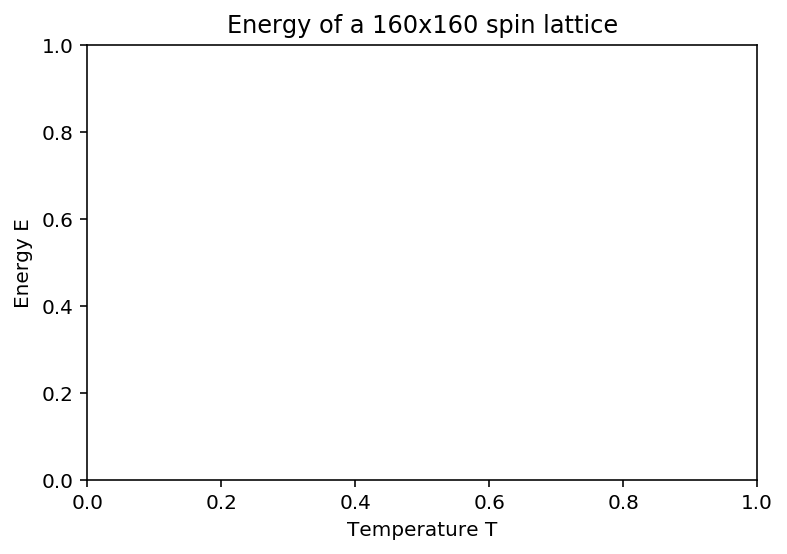

In [475]:
#plt.scatter(Ts, Es,color='blue')
plt.title("Energy of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Energy E")

Text(0, 0.5, 'Magnetization M')

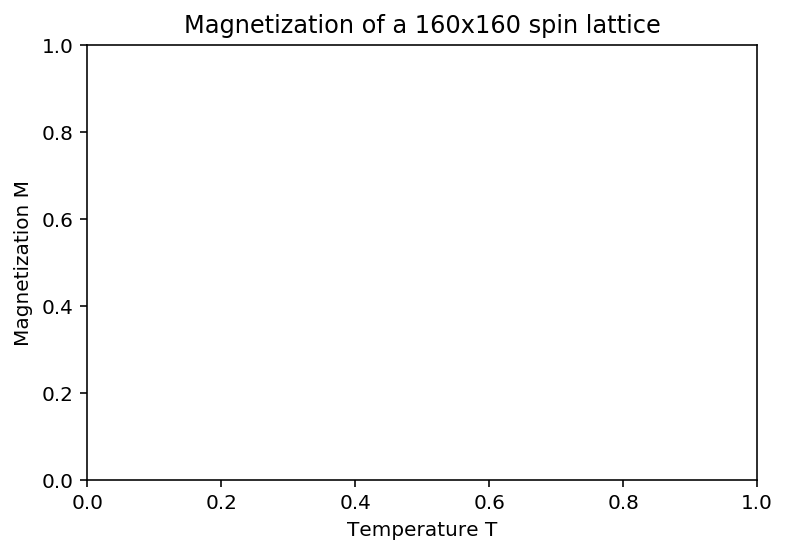

In [477]:
#plt.scatter(Ts, Ms,color='green')
plt.title("Magnetization of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Magnetization M")

Text(0, 0.5, 'Heat capacity $C_v(T)$')

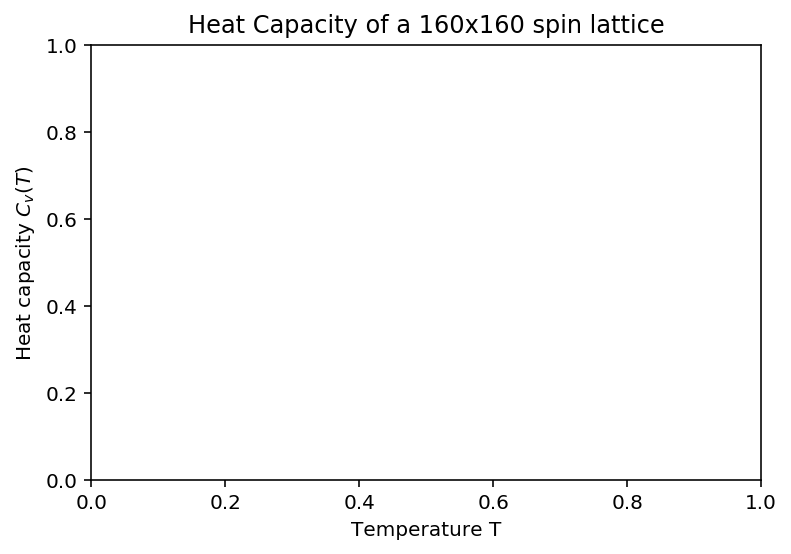

In [478]:
#plt.scatter(Ts, Cs,color='red')
plt.title("Heat Capacity of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Heat capacity $C_v(T)$")

Text(0, 0.5, 'Susceptibility $\\Xi(T)$')

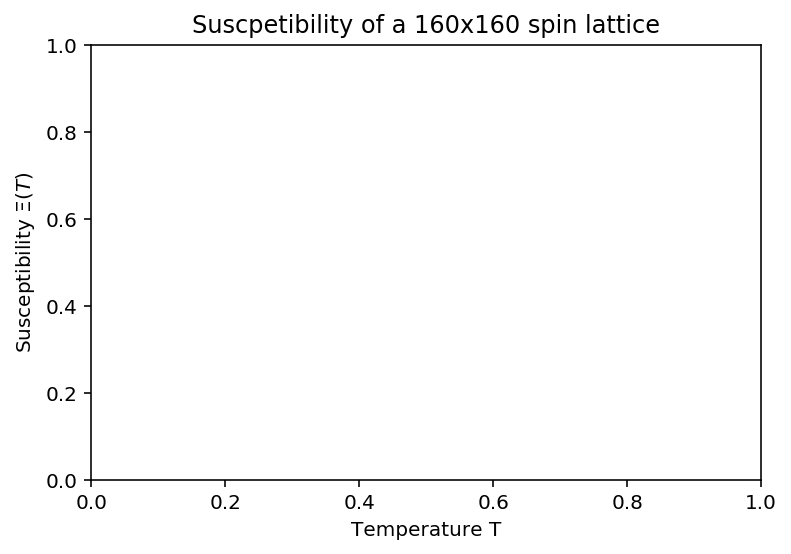

In [480]:
#plt.scatter(Ts, Xis,color='gold')
plt.title("Suscpetibility of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Susceptibility $\Xi(T)$")

In [484]:
'''Run this cell to render our markdown text with beautiful styles.'''
from IPython.core.display import HTML
def set_css_style(css_file_path):
    styles = open(css_file_path, "r").read()
    return HTML(styles)
set_css_style('./common/custom.css')